## Comments for Q1 to Q5

<span style="color: red;"> 

Q1: 4/4

Q2: 5/5

Q3: 14/15 – didn’t mention used log scale in axis label

Q4: 19/20 – no documentation

Q5:  5/5 

 </span>

## Answer 6.

In [4]:
## 6.1
def factorial(n): 
    fact = 1
    for i in range (1,(n+1)):
        fact = fact * i
    return fact

#n = int(input("Enter a positive integer: "))
#print(f"The Factorial of the number is {factorial(n)}")

Enter a positive integer:  5


The Factorial of the number is 120


## <span style="color: red;"> 5 </span>

In [16]:
## 6.2
def exp_brute(x):
    ans = 1
    diff = 1
    n = 1
    while(diff>0):
        prev_ans = ans 
        term = (x**n)/factorial(n)
        ans = ans + term
        diff = ans - prev_ans
        n = n + 1
    return ans

print(exp_brute(1))

2.7182818284590455


## <span style="color: red;"> 8</span>

In [17]:
## 6.3
import time
for x in [0.1,20]:
    start_time = time.time()
    result = exp_brute(x)
    end_time = time.time()
    
    t_diff = end_time - start_time
    print(f"Time taken for e^{x} = {t_diff}")

Time taken for e^0.1 = 3.814697265625e-05
Time taken for e^20 = 0.0003936290740966797


## <span style="color: red;"> 2 </span>

In [1]:
## 6.4
def exp_rec(x):
    ans = 1
    term = 1
    diff = 1
    n = 1
    terms = []
    cumulative = []
    while(abs(diff)>0):
        prev_ans = ans
        cumulative.append(ans)
        term = term * (x/n)
        terms.append(term)
        ans = ans + term
        diff = ans - prev_ans
        n = n + 1
    return ans, terms, cumulative

result, terms, cumulative  = exp_rec(20)
print(f"Result: {result}")
print(f"Series Terms: {terms}")
print(f"Cumulative Series: {cumulative}")

Result: 485165195.40979046
Series Terms: [20.0, 200.0, 1333.3333333333335, 6666.666666666668, 26666.66666666667, 88888.8888888889, 253968.25396825402, 634920.634920635, 1410934.744268078, 2821869.488536156, 5130671.797338465, 8551119.662230777, 13155568.711124273, 18793669.58732039, 25058226.116427187, 31322782.645533983, 36850332.52415763, 40944813.9157307, 43099804.12182178, 43099804.12182178, 41047432.49697313, 37315847.724521026, 32448563.238713935, 27040469.365594946, 21632375.492475957, 16640288.840366121, 12326139.881752681, 8804385.629823344, 6071990.089533341, 4047993.393022227, 2611608.6406595013, 1632255.4004121884, 989245.6972195081, 581909.2336585342, 332519.562090591, 184733.09005032835, 99855.72435152884, 52555.644395541494, 26951.612510534098, 13475.806255267049, 6573.564026959536, 3130.2685842664455, 1455.938876402998, 661.7903983649991, 294.1290659399996, 127.88220258260851, 54.41795854579086, 22.674149394079524, 9.254754854726336, 3.701901941890535, 1.451726251721778

## <span style="color: red;"> 10 </span>

In [19]:
## 6.5
import time
for x in [0.1,20]:
    start_time = time.time()
    result = exp_rec(x)
    end_time = time.time()
    
    t_diff = end_time - start_time
    print(f"Time taken for e^{x} = {t_diff}")

Time taken for e^0.1 = 1.1920928955078125e-05
Time taken for e^20 = 2.956390380859375e-05


## <span style="color: red;"> 2 </span>

exp_rec evaluates much faster than exp_brute for larger values of x

In [30]:
## 6.6
import numpy as np
print(f"Numpy exp(0.1): {np.exp(0.1)}")
print(f"Brute Force exp(0.1): {(exp_brute(0.1))}")
print(f"Recursion exp(0.1): {exp_rec(0.1)[0]}")
print("")
print(f"Numpy exp(20): {np.exp(20)}")
print(f"Brute Force exp(20): {exp_brute(20)}")
print(f"Recursion exp(20): {exp_rec(20)[0]}")

Numpy exp(0.1): 1.1051709180756477
Brute Force exp(0.1): 1.1051709180756473
Recursion exp(0.1): 1.1051709180756473

Numpy exp(20): 485165195.4097903
Brute Force exp(20): 485165195.40979016
Recursion exp(20): 485165195.40979046


For both cases we see discrepancy occurs for the 16th digit

## <span style="color: red;"> 1  for exp(20) discepency starts after 6 decimal digits</span>

Text(0, 0.5, '$X_{N}$')

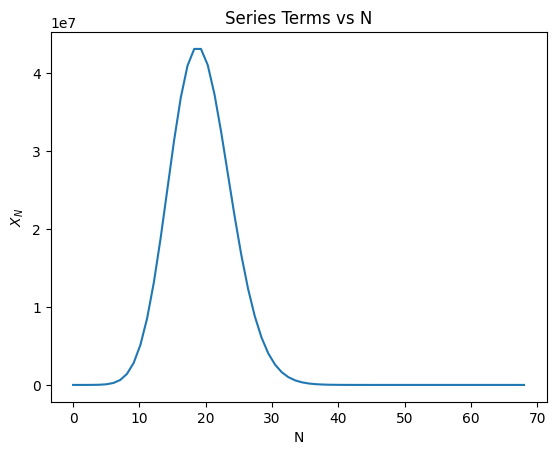

In [39]:
## 6.7
res, terms, _ = exp_rec(20)
nArr = np.linspace(0,len(terms),len(terms))
plt.plot(nArr, terms)
plt.title("Series Terms vs N")
plt.xlabel("N")
plt.ylabel("$X_{N}$")

The turning point is approximately around n=19

## <span style="color: red;"> 8 you have to show each point and please make plot beautiful use grid ,scatter plot , legend </span>

In [51]:
## 6.8

print(f"Numpy exp(-20): {np.exp(-20)}")
print(f"Recursion exp(-20): {exp_rec(-20)[0]}")
error = (exp_rec(-20)[0]-np.exp(-20))/np.exp(-20)
print(f"Error: {error}")

Numpy exp(-20): 2.061153622438558e-09
Recursion exp(-20): 6.147561828914626e-09
Accuracy: 1.9825830360191323


If Numpy is assumed to be correct then the recursion function gives a value 198% more than the true value.
This can be understood with the following plot

Text(0, 0.5, '$C_{N}$')

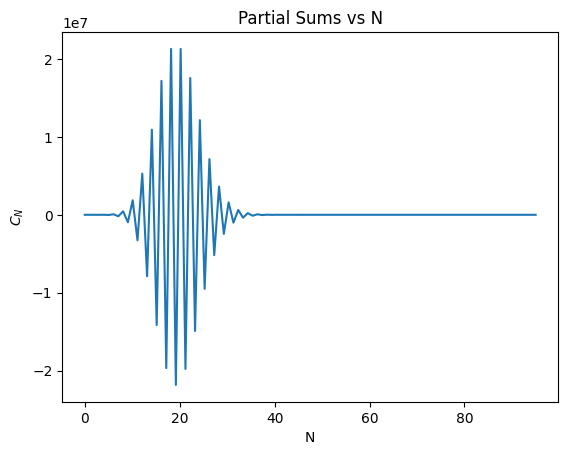

In [58]:
res, _, cumulative = exp_rec(-20)
nArr = np.linspace(0,len(cumulative),len(cumulative))
plt.plot(nArr, cumulative)
plt.title("Partial Sums vs N")
plt.xlabel("N")
plt.ylabel("$C_{N}$")

The partial sums of the series fluctuates a lot between very large values, taking the difference starts to introduce catastrophic cancellation errors, thereby giving us a poor result


## <span style="color: red;"> 9 elaborate more </span>
## Reason
The magnitude of  $𝑥^n$ decreases rapidly as  n increases, making terms very small, close to machine precision.

Each term $ \frac{x^n}{n!} $ requires computing $ x^n $ and $ n! $, which grow or shrink rapidly.

For $ x = -20 $, the factorial $ n! $ grows exponentially, while $ x^n $ decreases quickly, resulting in **numerical underflow**. This limits the accuracy of the sum.




In [59]:
## 6.9

res, _, _  = exp_rec(20)
result = 1/res
print(f"Numpy exp(-20): {np.exp(-20)}")
print(f"Recursion exp(-20): {result}")
error = (result-np.exp(-20))/np.exp(-20)
print(f"Error: {error}")

Numpy exp(-20): 2.061153622438558e-09
Recursion exp(-20): 2.061153622438557e-09
Error: -4.013192435284797e-16


Since negative values of exponent brought fluctuations in signs of partial sums, a better way to use the function would be to make use of the fact

$e^{-x} = \dfrac{1}{e^x}$

Doing this gives us a much better result with a very low error

## <span style="color: red;"> 2 </span>